# Manipulating geospatial data with Cartopy

In [1]:
import io
import requests
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as col
from matplotlib.colors import Normalize
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
%matplotlib inline

In [2]:
countries = shpreader.Reader('data/africa/ne_10m_admin_0_countries.shp')

In [3]:
africa = [c for c in countries.records()
          if c.attributes['CONTINENT'] == 'Africa']

In [4]:
crs = ccrs.PlateCarree()
extent = [-23.03, 55.20, -37.72, 40.58]

In [5]:
def draw_africa(ax):
    ax.set_extent(extent)
    ax.coastlines()

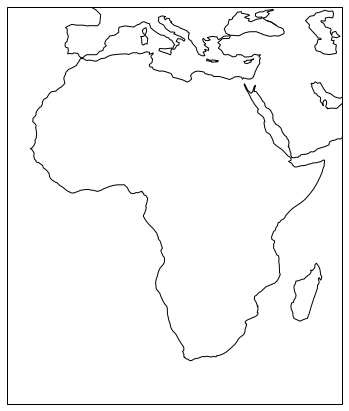

In [6]:
fig, ax = plt.subplots(
    1, 1, figsize=(6, 8),
    subplot_kw=dict(projection=crs))
draw_africa(ax)

In [7]:
def choropleth(ax, attr, cmap_name):
    # We need to normalize the values before we can
    # use the colormap.
    values = [c.attributes[attr] for c in africa]
    norm = Normalize(
        vmin=min(values), vmax=max(values))
    cmap = plt.cm.get_cmap(cmap_name)
    for c in africa:
        v = c.attributes[attr]
        sp = ShapelyFeature(c.geometry, crs,
                            edgecolor='k',
                            facecolor=cmap(norm(v)))
        ax.add_feature(sp)

Text(0.5, 1.0, 'GDP')

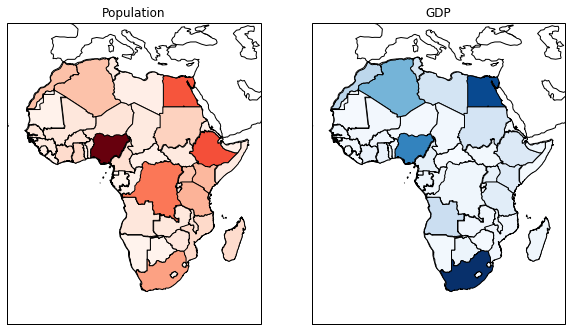

In [8]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(10, 16),
    subplot_kw=dict(projection=crs))
draw_africa(ax1)
choropleth(ax1, 'POP_EST', 'Reds')
ax1.set_title('Population')

draw_africa(ax2)
choropleth(ax2, 'GDP_MD_EST', 'Blues')
ax2.set_title('GDP')